# We here work with MNIST classification dataset

training pipeline in pytorch
* Design model(input,output size, forward pass)
* Construct loss and optimizer
* Training loop
    * forward pass: compute prediction
    * backward pass: gradients
    * update weights

torch.Size([100, 1, 28, 28]) torch.Size([100])


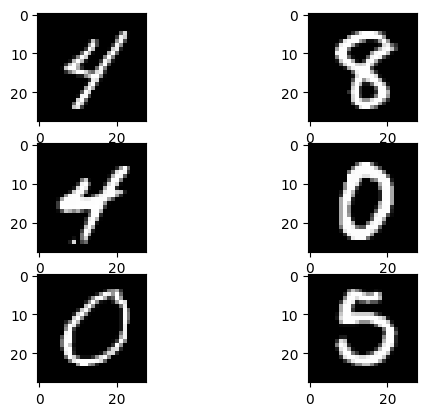

epoch 1/2, step 100/600, loss = 0.4631
epoch 1/2, step 200/600, loss = 0.4491
epoch 1/2, step 300/600, loss = 0.2427
epoch 1/2, step 400/600, loss = 0.2517
epoch 1/2, step 500/600, loss = 0.3416
epoch 1/2, step 600/600, loss = 0.3955
epoch 2/2, step 100/600, loss = 0.1973
epoch 2/2, step 200/600, loss = 0.1918
epoch 2/2, step 300/600, loss = 0.1322
epoch 2/2, step 400/600, loss = 0.2666
epoch 2/2, step 500/600, loss = 0.2303
epoch 2/2, step 600/600, loss = 0.1574
accuracy = 0.95


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyperparams
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
lr = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data',train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',train = False, transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(samples[i][0], cmap='gray')

plt.show()


# Design model
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out


model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if not (i+1)%100:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')


# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs,1)
        n_samples+=labels.shape[0]
        n_correct = (predictions==labels).sum().item()
    acc = 100.0 * n_correct/n_samples
    print(f'accuracy = {acc}')
